In [10]:
#from IPython import embed
from coordinates_helpers import *
import scipy.io as sio
import netCDF4 as nc
import numpy as np
import datetime
import xarray as xr
from salishsea_tools import nc_tools, viz_tools
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

%matplotlib inline


In [84]:
# This script builds a coordinates file for the West Coast of Vancouver Island
#
# For reference, the Arakawa-C grid looks like this:
#           f---v---f---v---f  
#           |       |       |
#           u   T   u   T   u
#           |       |       |
#           f---v---f---v---f
#

## Load the x and y vectors 
#ncf = nc.Dataset('basic_grid_seagridv2.nc', 'r')
#x = ncf.variables['grid_lons'][:]
#y = ncf.variables['grid_lats'][:]

# Create 2D array with meshgrid, indexed j,i
#[glamt, gphit]=np.meshgrid(x,y)

mfile = sio.loadmat('/home/ssahu/saurav/NEMO_run/seagrid_high_resolution.mat')
# mfile = sio.loadmat('/home/ssahu/saurav/NEMO_run/seagrid_high_resolution_truncated.mat')
glamt = mfile['s'][0,0]['geographic_grids'][0,0]
gphit = mfile['s'][0,0]['geographic_grids'][0,1]

In [85]:
glamt = np.transpose(glamt)
gphit = np.transpose(gphit)

print(glamt.shape)

(401, 401)


### We need to increase the grid spacing of the western bdy points and so take out a chunk of the west bdy from our domain

In [86]:
glamt_new = glamt[:, 100:]
gphit_new = gphit[:, 100:]

print(glamt_new.shape)

(401, 301)


In [87]:
glamt = glamt_new
gphit = gphit_new

print(glamt.shape)

(401, 301)


In [89]:
# Compute the rest of the grid points
glamu,gphiu = t2u(glamt,gphit)
glamv,gphiv = t2v(glamt,gphit)
glamf,gphif = t2f(glamt,gphit)

# Compute scaling factors (with extrapolation for the left/bottom most scaling factor)
#
e1t = gete1(glamu,gphiu,expandleft=True)   # Need a left u point
e1u = gete1(glamt,gphit)
e1v = gete1(glamf,gphif,expandleft=True)   # Need a left f point
e1f = gete1(glamv,gphiv)
#
e2t = gete2(glamv,gphiv,expanddown=True)   # Need a lower v point
e2u = gete2(glamf,gphif,expanddown=True)   # Need a lower f point
e2v = gete2(glamt,gphit)
e2f = gete2(glamu,gphiu)

# We need to drop the last column at the east and last row at the north
NY,NX = glamt.shape

# Output slices
J,I = slice(10,NY-1), slice(10,NX-1)    ## this is where we truncate the seagrid grid 

#
filename = "coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc"
writecoords(filename,
            glamt[J,I],glamu[J,I],glamv[J,I],glamf[J,I],
            gphit[J,I],gphiu[J,I],gphiv[J,I],gphif[J,I],
            e1t[J,I],e1u[J,I],e1v[J,I],e1f[J,I],
            e2t[J,I],e2u[J,I],e2v[J,I],e2f[J,I])

# Add note to history
#cnc = nc.Dataset(filename, 'r+')
#note ='[{}] Rebuilt with correct scaling factors (e1* and e2*)'
#cnc.setncattr('history', note.format(datetime.datetime.today().strftime('%Y-%m-%d')))
#cnc.close()

In [17]:
# Compute the rest of the grid points
glamu,gphiu = t2u(glamt,gphit)
glamv,gphiv = t2v(glamt,gphit)
glamf,gphif = t2f(glamt,gphit)

# Compute scaling factors (with extrapolation for the left/bottom most scaling factor)
#
e1t = gete1(glamu,gphiu,expandleft=True)   # Need a left u point
e1u = gete1(glamt,gphit)
e1v = gete1(glamf,gphif,expandleft=True)   # Need a left f point
e1f = gete1(glamv,gphiv)
#
e2t = gete2(glamv,gphiv,expanddown=True)   # Need a lower v point
e2u = gete2(glamf,gphif,expanddown=True)   # Need a lower f point
e2v = gete2(glamt,gphit)
e2f = gete2(glamu,gphiu)

# We need to drop the last column at the east and last row at the north
NY,NX = glamt.shape

# Output slices
J,I = slice(10,NY-1), slice(10,NX-1)    ## this is where we truncate the seagrid grid 

#
filename = "coordinates_westcoast_seagrid_high_resolution_truncated.nc"
writecoords(filename,
            glamt[J,I],glamu[J,I],glamv[J,I],glamf[J,I],
            gphit[J,I],gphiu[J,I],gphiv[J,I],gphif[J,I],
            e1t[J,I],e1u[J,I],e1v[J,I],e1f[J,I],
            e2t[J,I],e2u[J,I],e2v[J,I],e2f[J,I])

# Add note to history
#cnc = nc.Dataset(filename, 'r+')
#note ='[{}] Rebuilt with correct scaling factors (e1* and e2*)'
#cnc.setncattr('history', note.format(datetime.datetime.today().strftime('%Y-%m-%d')))
#cnc.close()

In [3]:
grid_old = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated.nc')


In [90]:
grid = nc.Dataset('coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


In [91]:
nc_tools.show_variables(grid)

odict_keys(['nav_lon', 'nav_lat', 'time', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f'])


In [92]:
nc_tools.show_dimensions(grid)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 290

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 390

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1



In [93]:
nc_tools.show_dataset_attrs(grid)

file format: NETCDF4


In [94]:
%matplotlib notebook
import matplotlib.pyplot as plt
lon = grid['glamt'][:]
lat = grid['gphit'][:]


<IPython.core.display.Javascript object>


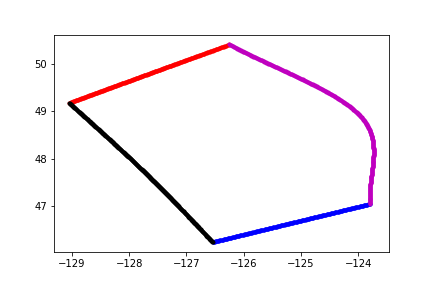

In [95]:
plt.figure(); plt.clf()
plt.plot(glamt[0,:],gphit[0,:],'b.')
plt.plot(glamt[-1,:],gphit[-1,:],'r.')
plt.plot(glamt[:,0],gphit[:,0],'k.')
plt.plot(glamt[:,-1],gphit[:,-1],'m.')



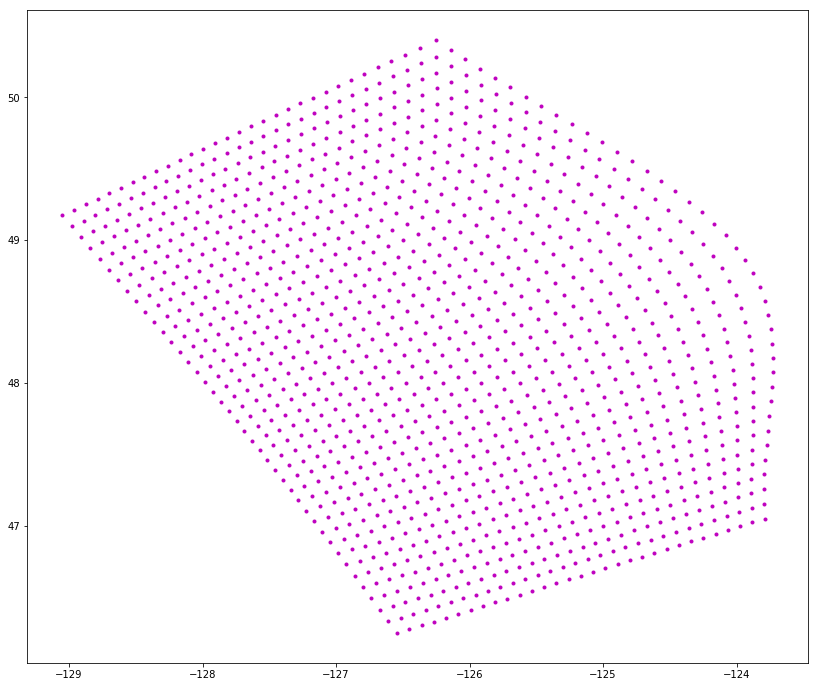

In [96]:
%matplotlib inline
plt.figure(); plt.clf()
fig = plt.figure(figsize=(14,12))
plt.plot(glamt[::10,::10],gphit[::10,::10],'m.')
# plt.plot(glamt[-1,:],gphit[-1,:],'r.')
# plt.plot(glamt[:,0],gphit[:,0],'k.')
# plt.plot(glamt[:,-1],gphit[:,-1],'m.')




### Old Grid

In [7]:
#Load the ouput file of JP together with all the scaling factors

coord_old = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated.nc')
nc_tools.show_variables(coord_old)

T_grid_lon = coord_old.variables['glamt'][0,:]
T_grid_lat = coord_old.variables['gphit'][0,:]

e1t = coord_old.variables['e1t'][:,:]
e2t = coord_old.variables['e2t'][:,:]
print(np.min(e1t),np.max(e1t))
print(np.min(e2t),np.max(e2t))

odict_keys(['nav_lon', 'nav_lat', 'time', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f'])
774.942675829 1511.81693136
636.96964217 1547.25522795


<a list of 1 text.Text objects>

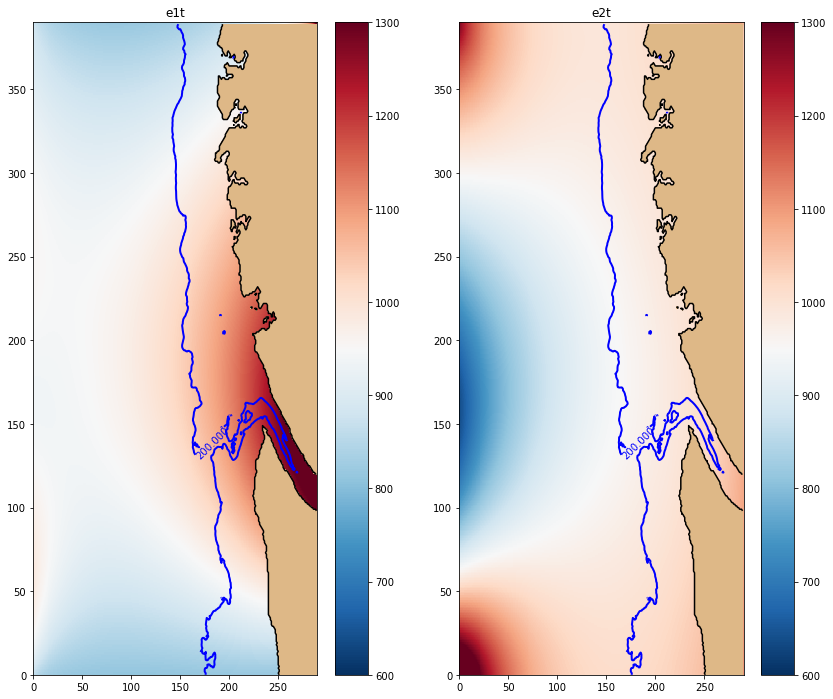

In [12]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'
bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)

ax = [0, 0]
# date_NW = parse('2016 May 7 12:00')
# date_SE = parse('2016 Oct 15 12:00')

fig = plt.figure(figsize=(14,12))

gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.1)

# ax[3] = plt.subplot(gs[0:, 1])
ax[1] = plt.subplot(gs[0:, 1])
# ax[2] = plt.subplot(gs[1:, 1])
ax[0] = plt.subplot(gs[0:, 0])
# viz_tools.set_aspect(ax1)
# mesh = ax1.pcolormesh(T_grid_lon, T_grid_lat, e1t[0,...], cmap =cm.dense, vmin = 800, vmax = 1000)
mesh = ax[0].pcolormesh(e1t[0,...], vmin=600, vmax = 1300, cmap='RdBu_r')
viz_tools.plot_land_mask(ax[0], bathy , xslice=np.arange(T_grid_lat.shape[1]), yslice=np.arange(T_grid_lat.shape[0]), color='burlywood')
viz_tools.plot_coastline(ax[0], bathy)

mesh2 = ax[1].pcolormesh(e2t[0,...], vmin=600, vmax = 1300, cmap='RdBu_r')
viz_tools.plot_land_mask(ax[1], bathy , xslice=np.arange(T_grid_lat.shape[1]), yslice=np.arange(T_grid_lat.shape[0]), color='burlywood')
viz_tools.plot_coastline(ax[1], bathy)

ax[0].set_title("e1t")
ax[1].set_title("e2t")
cbar = fig.colorbar(mesh2, ax=ax[1])
cbar = fig.colorbar(mesh, ax=ax[0])
CS = ax[0].contour(x_slice,y_slice,bathymetry, levels = [200], colors=('blue',),linestyles=('-',),linewidths=(2,),label = "200m Isoabth")
CS2 = ax[1].contour(x_slice,y_slice,bathymetry, levels = [200], colors=('blue',),linestyles=('-',),linewidths=(2,),label = "200m Isoabth")

plt.clabel(CS)
plt.clabel(CS2)

### New grid

In [14]:
#Load the ouput file of JP together with all the scaling factors

coord = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')
nc_tools.show_variables(coord)

T_grid_lon = coord.variables['glamt'][0,:]
T_grid_lat = coord.variables['gphit'][0,:]

e1t = coord.variables['e1t'][:,:]
e2t = coord.variables['e2t'][:,:]
print(np.min(e1t),np.max(e1t))
print(np.min(e2t),np.max(e2t))

odict_keys(['nav_lon', 'nav_lat', 'time', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f'])
741.923107242 1480.74262782
884.328608906 1145.27831545


<a list of 1 text.Text objects>

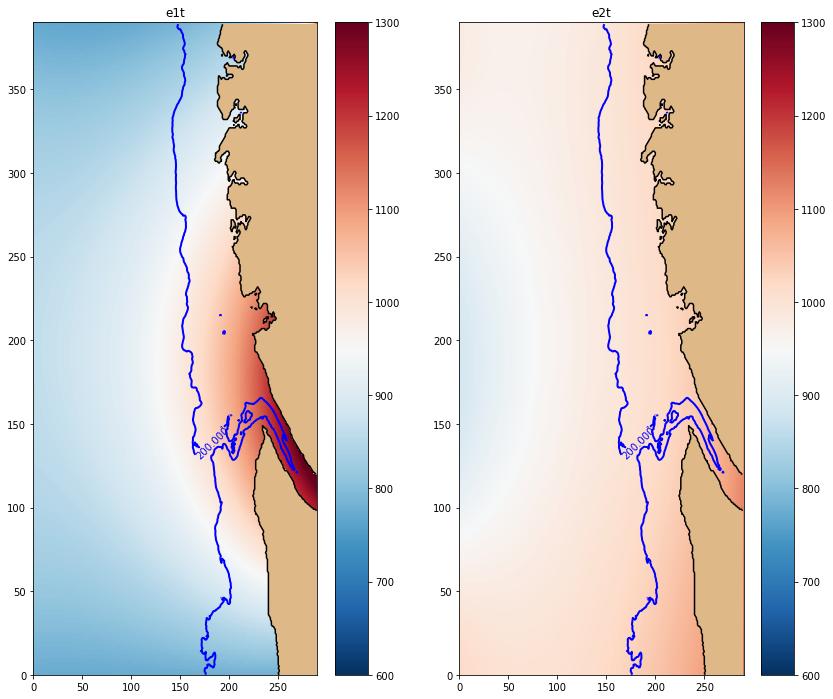

In [17]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/bathy_meter_high_res_wider_bdy.nc'
bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)

ax = [0, 0]
# date_NW = parse('2016 May 7 12:00')
# date_SE = parse('2016 Oct 15 12:00')

fig = plt.figure(figsize=(14,12))

gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.1)

# ax[3] = plt.subplot(gs[0:, 1])
ax[1] = plt.subplot(gs[0:, 1])
# ax[2] = plt.subplot(gs[1:, 1])
ax[0] = plt.subplot(gs[0:, 0])
# viz_tools.set_aspect(ax1)
# mesh = ax1.pcolormesh(T_grid_lon, T_grid_lat, e1t[0,...], cmap =cm.dense, vmin = 800, vmax = 1000)
mesh = ax[0].pcolormesh(e1t[0,...], vmin=600, vmax = 1300, cmap='RdBu_r')
viz_tools.plot_land_mask(ax[0], bathy , xslice=np.arange(T_grid_lat.shape[1]), yslice=np.arange(T_grid_lat.shape[0]), color='burlywood')
viz_tools.plot_coastline(ax[0], bathy)

mesh2 = ax[1].pcolormesh(e2t[0,...], vmin=600, vmax = 1300, cmap='RdBu_r')
viz_tools.plot_land_mask(ax[1], bathy , xslice=np.arange(T_grid_lat.shape[1]), yslice=np.arange(T_grid_lat.shape[0]), color='burlywood')
viz_tools.plot_coastline(ax[1], bathy)

ax[0].set_title("e1t")
ax[1].set_title("e2t")
cbar = fig.colorbar(mesh2, ax=ax[1])
cbar = fig.colorbar(mesh, ax=ax[0])

CS = ax[0].contour(x_slice,y_slice,bathymetry, levels = [200], colors=('blue',),linestyles=('-',),linewidths=(2,),label = "200m Isoabth")
CS2 = ax[1].contour(x_slice,y_slice,bathymetry, levels = [200], colors=('blue',),linestyles=('-',),linewidths=(2,),label = "200m Isoabth")

plt.clabel(CS)
plt.clabel(CS2)

In [104]:
e1t.shape

(1, 390, 290)

In [106]:
bathy_data = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc')

X = bathy_data.variables['nav_lon']
Y = bathy_data.variables['nav_lat']
Z = np.array(bathy_data.variables['Bathymetry'])

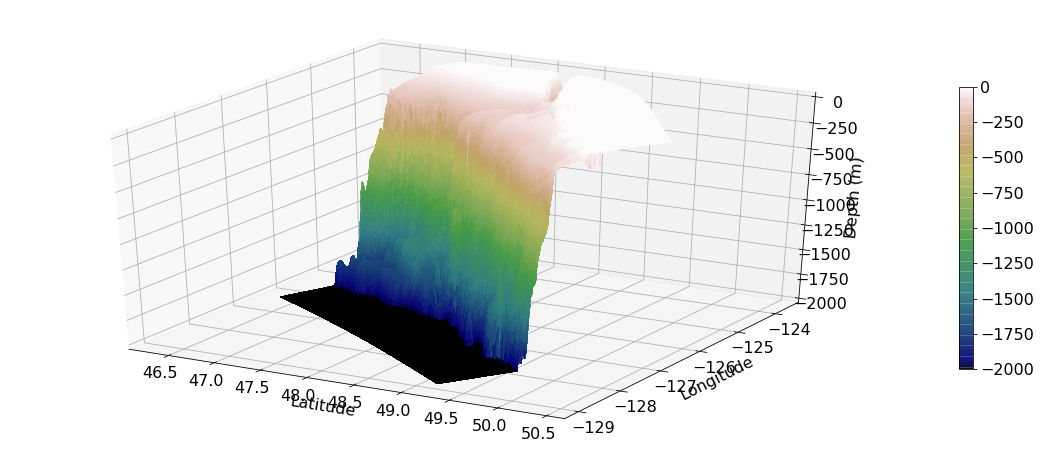

In [115]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':16})

# Plot 3D bathymetry

fig = plt.figure(figsize=(20,8))


# xvec = np.arange(Z.shape[0])
# yvec= np.arange(Z.shape[1])

# X,Y = np.meshgrid(yvec,xvec,indexing = 'xy')


# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_surface(Y,X,np.multiply(-1,Z), rstride=1, cstride=1,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
# cset = ax.contour(Y,X,Z, colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')

ax.set_aspect('auto')

# ax.view_init(25, 350+180) # elevation and azimuth


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth (m)')

plt.show()